<a href="https://colab.research.google.com/github/nehan0306/Cartoonifying_an_image/blob/main/Cartoonifying.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Cartoonifying an image**

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

Loading the original image

In [2]:
def load_image(file):
  image = plt.imread(file)
  #image =cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
  plt.imshow(np.real(image))
  plt.axis('off')
  plt.show()
  return image


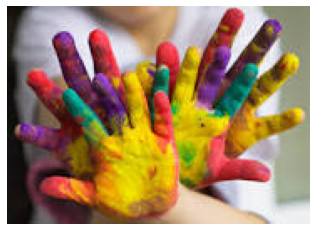

In [3]:
f = "1.jpg"
img = load_image(f)

Edge masking

In [4]:
def edge_mask(image, line_size, blur_value):
  gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
  gray_blur =  cv2.medianBlur(gray,blur_value)
  edges = cv2.adaptiveThreshold(gray_blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, 
                                cv2.THRESH_BINARY, line_size, blur_value)
  return edges
  

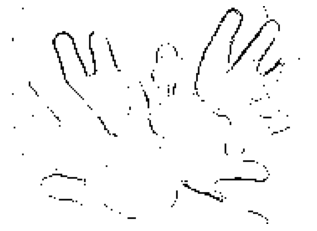

In [5]:
edges = edge_mask(img, 3, 7)
plt.imshow(edges, cmap = "gray")
plt.axis('off')
plt.show()

Image quantization

In [6]:
def color_quan(image, k):
  data = np.float32(image).reshape((-1,3))
  criteria = (cv2.TERM_CRITERIA_EPS+ cv2.TERM_CRITERIA_MAX_ITER, 20, 0.001)
  r, layer, center = cv2.kmeans(data, k, None, criteria, 10, cv2.KMEANS_RANDOM_CENTERS)
  center = np.uint8(center)
  res = center[layer.flatten()]
  res = res.reshape(image.shape)
  return res


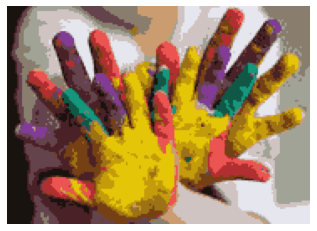

In [7]:
img1 = color_quan(img, k=17)
plt.imshow(img1)
plt.axis('off')
plt.show()

Image blurring

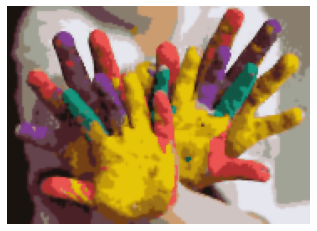

In [8]:
blur = cv2.bilateralFilter(img1, d=1, sigmaColor = 100, sigmaSpace = 100)
plt.imshow(blur)
plt.axis('off')
plt.show()

Cartoonifying

In [9]:
def cartoon(blur):
  c = cv2.bitwise_and(blur, blur, mask = edges)
  plt.imshow(img)
  plt.title('Original Image')
  plt.axis('off')
  plt.show()

  plt.imshow(c)
  plt.title('Cartoonified Image')
  plt.axis('off')
  plt.show()

  

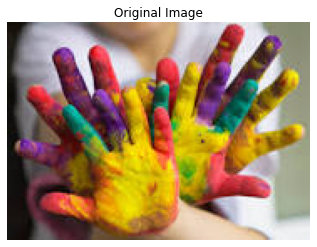

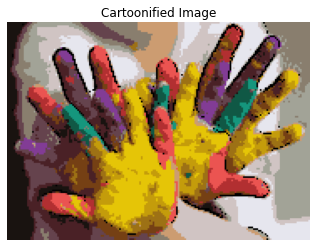

In [10]:
cartoon(img1)